In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping , ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder

nltk.download("stopwords")

2024-07-10 21:02:52.306000: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 21:02:52.306137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 21:02:52.475361: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df=pd.read_csv("/kaggle/input/spam-emails/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df["Message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
df["Category"][1]

'ham'

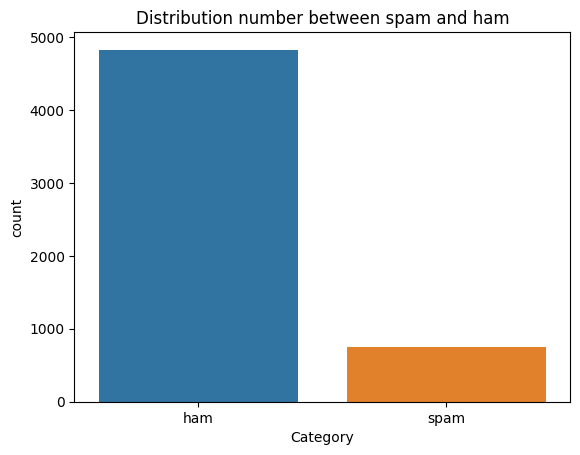

In [6]:
sns.countplot(x="Category",data=df)
plt.title("Distribution number between spam and ham")
plt.show()

In [7]:
## delete punctuation

punctuations=string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
def remove_punctuation(Message):
    z=str.maketrans("","",punctuations)
    return Message.translate(z)

In [9]:
df["Message"]=df["Message"].apply(lambda x: remove_punctuation(x))
df.head(10)

,Category,Message
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...
5,spam,FreeMsg Hey there darling its been 3 weeks now...
6,ham,Even my brother is not like to speak with me T...
7,ham,As per your request Melle Melle Oru Minnaminun...
8,spam,WINNER As a valued network customer you have b...
9,spam,Had your mobile 11 months or more U R entitled...


In [10]:
df["Message"][2]

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s'

In [11]:
## remove stopwords

def remove_stopwords(Message):
    stop_words=stopwords.words("english")
    
    imp_words=[]
    
    for word in str(Message).split():
        word.lower()
        
        if word not in stop_words:
            imp_words.append(word)
            
    output=" ".join(imp_words)
    return output

In [12]:
df["Message"]=df["Message"].apply(lambda Message: remove_stopwords(Message))
df.head(10)

,Category,Message
0,ham,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor U c already say
4,ham,Nah I dont think goes usf lives around though
5,spam,FreeMsg Hey darling 3 weeks word back Id like ...
6,ham,Even brother like speak They treat like aids p...
7,ham,As per request Melle Melle Oru Minnaminunginte...
8,spam,WINNER As valued network customer selected rec...
9,spam,Had mobile 11 months U R entitled Update lates...


In [13]:
df["Message"][1]

'Ok lar Joking wif u oni'

In [14]:
encoder=LabelEncoder()
df["Category"]=encoder.fit_transform(df["Category"])
df["Category"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [15]:
df["Category"][1]

0

In [16]:
x_train,x_test,y_train,y_test=train_test_split(df["Message"],
                                              df["Category"],
                                              test_size=0.2,
                                              random_state=42)

In [17]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_train)

train_sequences=tokenizer.texts_to_sequences(x_train)
test_sequences=tokenizer.texts_to_sequences(x_test)

max_len=100


In [18]:
train_sequences=pad_sequences(train_sequences,
                             maxlen=max_len,
                             padding="post",
                             truncating="post")

In [19]:
test_sequences=pad_sequences(test_sequences,
                            maxlen=max_len,
                            padding="post",
                            truncating="post")

In [20]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1,
                                   output_dim=32,
                                   input_length=max_len))

model.add(tf.keras.layers.LSTM(17))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy,
             optimizer="adam",metrics=["accuracy"])

In [23]:
es=EarlyStopping(patience=3,
                monitor="val_accuracy",
                restore_best_weights=True,
                mode="max")

In [24]:
lr=ReduceLROnPlateau(patience=2,
                    monitor="val_loss",
                    factor=0.5,
                    verbose=0)

In [25]:
history=model.fit(train_sequences,y_train,
                 validation_data=(test_sequences,y_test),
                 epochs=30,
                 batch_size=32,
                 callbacks=[lr,es])

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8419 - loss: 0.4799 - val_accuracy: 0.8664 - val_loss: 0.3935 - learning_rate: 0.0010
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8636 - loss: 0.3988 - val_accuracy: 0.8664 - val_loss: 0.3932 - learning_rate: 0.0010
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.8698 - loss: 0.3876 - val_accuracy: 0.8664 - val_loss: 0.3933 - learning_rate: 0.0010
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8717 - loss: 0.3843 - val_accuracy: 0.8664 - val_loss: 0.3933 - learning_rate: 0.0010


In [26]:
test_accuracy,test_loss = model.evaluate(test_sequences,y_test)

print(test_accuracy)
print(test_loss)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8793 - loss: 0.3702
0.3935236632823944
0.8663676977157593


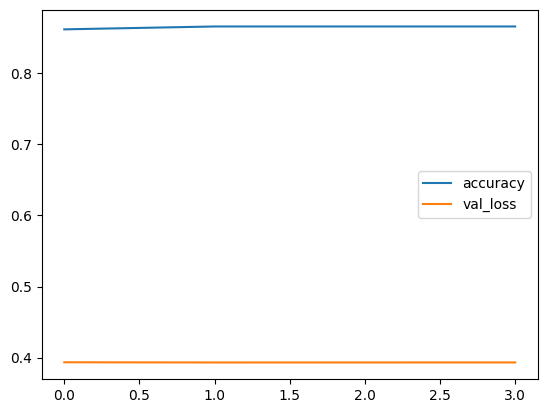

In [27]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

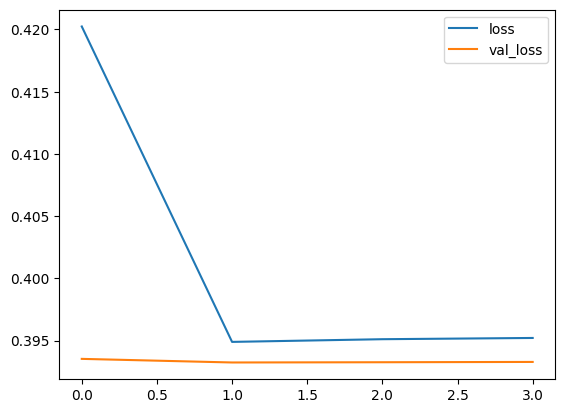

In [28]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()